MIDTERM 2023


In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.4 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 3.3 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 9.5 MB/s  eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import pandas as pd
import numpy as np



In [4]:
import os
import requests
import zipfile
import pandas as pd
from io import BytesIO

# Replace XXXXXXX with your CUNI student number
student_id = "44230774"
url = f"https://ies-python-midterm.s3.eu-central-1.amazonaws.com/studentsSets/{student_id}.zip"

# Download 
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# extract
zip_file.extractall(path="data")

# CSV FILENAME
csv_filename = None
for name in zip_file.namelist():
    if name.endswith('.csv'):
        csv_filename = name
        break

if csv_filename is None:
    raise ValueError("No CSV file found in the downloaded dataset")

# Access the CSV file and ensure the dates are in Datetime format
ticker_filename = f"data/{csv_filename}"
df = pd.read_csv(ticker_filename, parse_dates=['Date'], index_col='Date')
adj_close = df['Adj Close']


In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,16.840000,16.580000,16.690001,16.650000,994700,16.650000
2017-11-14,17.110001,16.530001,16.709999,16.590000,1785100,16.590000
2017-11-15,16.860001,16.301001,16.510000,16.469999,2063000,16.469999
2017-11-16,16.879999,16.395000,16.580000,16.420000,6425300,16.420000
2017-11-17,16.750000,16.410000,16.420000,16.469999,2198900,16.469999


Data Analysis part

In [6]:
# 1
no_diff = (df['Close'] == df['Adj Close']).all()

if no_diff:
    print("There is a company with no difference between the Close and Adj Close columns.")
else:
    print("There is no company with no difference between the Close and Adj Close columns.")


There is a company with no difference between the Close and Adj Close columns.


If tehre is no diffrence betweeen the Close and Adjusted Close columns for a particlar company, it implies taht there have been no events afecting the stock price that require adjusments. These adjustmets typically account for stock splits, dividends, and other corprate actions that can impact the stock's value.

From a financal point of view, a stock with no diference between its Close and Adjusted Close columns indicates that it has experienced no corporate actions like stock splits or dividend payments during the analyzd period. This can suggest that the company has had a relatively stable finacial performance without significant changes in its capital structure or dividend policies.

In [7]:
import numpy as np
# 2
highest_price = adj_close.max()
lowest_price = adj_close.min()

print(f"Highest price (Adj Close): {highest_price}")
print(f"Lowest price (Adj Close): {lowest_price}")

# 3

# logret
log_returns = np.log(adj_close / adj_close.shift(1)).dropna()

min_return = log_returns.min()
max_return = log_returns.max()
mean_return = log_returns.mean()
median_return = log_returns.median()

print(f"Min return: {min_return}")
print(f"Max return: {max_return}")
print(f"Mean return: {mean_return}")
print(f"Median return: {median_return}")


Highest price (Adj Close): 296.9100036621094
Lowest price (Adj Close): 16.31999969482422
Min return: -0.18808053648051026
Max return: 0.23309686913006253
Mean return: 0.0015405975503614896
Median return: 0.0013900879444659635


In [8]:
# 4
highest_gain_date = log_returns.idxmax()
highest_loss_date = log_returns.idxmin()

print(f"Highest gain date: {highest_gain_date}")
print(f"Highest loss date: {highest_loss_date}")


Highest gain date: 2018-06-14 00:00:00
Highest loss date: 2020-11-09 00:00:00


In [9]:
#5
average_weekly_volume = df['Volume'].resample('W').mean()

print("Average calendar weekly volume:")
print(average_weekly_volume)


Average calendar weekly volume:
Date
2017-11-19    2693400.0
2017-11-26    1761200.0
2017-12-03    2332560.0
2017-12-10    3537660.0
2017-12-17    2794460.0
                ...    
2022-10-16    4433940.0
2022-10-23    3162280.0
2022-10-30    3093260.0
2022-11-06    6135220.0
2022-11-13    3372900.0
Freq: W-SUN, Name: Volume, Length: 261, dtype: float64


The company with the highest total return over the whole period is: 2017-11-13 00:00:00


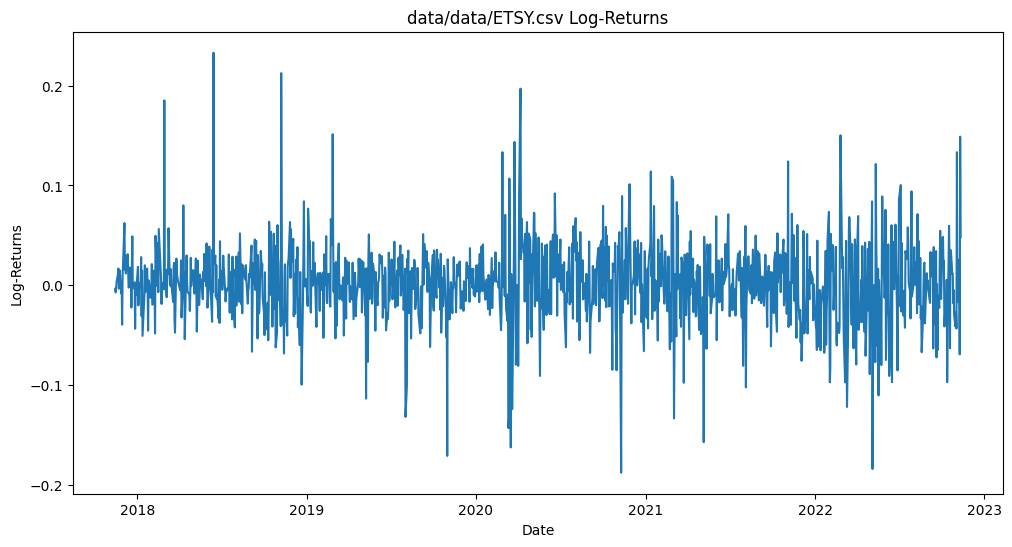

In [17]:
# 6 and 7
# tot_ret
df['Total Return'] = ((df['Adj Close'].iloc[-1] - df['Adj Close'].iloc[0]) / df['Adj Close'].iloc[0]) * 100

# Find company with highest total return
highest_return = df['Total Return'].idxmax()
print(f"The company with the highest total return over the whole period is: {highest_return}")



import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.plot(log_returns)
plt.title(f"{ticker_filename} Log-Returns")
plt.xlabel("Date")
plt.ylabel("Log-Returns")
plt.show()


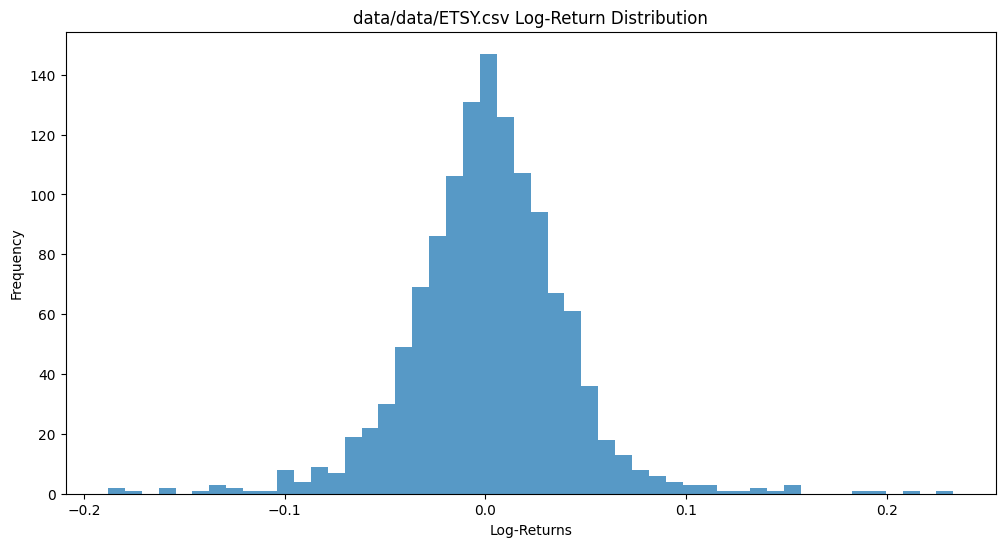

In [12]:
import matplotlib.pyplot as plt
# 8 (not in the same plots, sorry (but it was ideally not mandatory))
plt.figure(figsize=(12, 6))
plt.hist(log_returns, bins=50, alpha=0.75)
plt.title(f"{ticker_filename} Log-Return Distribution")
plt.xlabel("Log-Returns")
plt.ylabel("Frequency")
plt.show()


PART 2

In [18]:
import pandas as pd

url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"

df = pd.read_csv(url)

print(df.head())


  Symbol     Security  GICS Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  


In [19]:
# 1
missing_inclusion_dates = df['included'].isna().sum()
print(f"Number of corporatzions: {missing_inclusion_dates}")


Number of corporatzions: 45


In [20]:
print(df.columns)

Index(['Symbol', 'Security', 'GICS Sector', 'hq', 'included', 'Founded'], dtype='object')


In [21]:
#2
# remove
df_cleaned = df.dropna(subset=['included'])

# datetime
df_cleaned['included'] = pd.to_datetime(df_cleaned['included'], dayfirst=True, errors='coerce')

# old_young
oldest_constituent = df_cleaned.loc[df_cleaned['included'].idxmin()]
youngest_constituent = df_cleaned.loc[df_cleaned['included'].idxmax()]

# avg
avg_age = (pd.Timestamp.now() - df_cleaned['included']).mean()

print(f"Oldest constituent: {oldest_constituent['Security']}")
print(f"Youngest constituent: {youngest_constituent['Security']}")
print(f"Average age of a constituent: {avg_age}")


Oldest constituent: Altria
Youngest constituent: Arch Capital Group
Average age of a constituent: 7947 days 14:58:59.272793472


/var/folders/04/7w96f6054nn3b4jcfrrz9k480000gn/T/ipykernel_50710/3180110483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['included'] = pd.to_datetime(df_cleaned['included'], dayfirst=True, errors='coerce')


Information Technology    68
Industrials               66
Health Care               60
Financials                55
Consumer Discretionary    52
Consumer Staples          33
Real Estate               30
Materials                 26
Communication Services    23
Utilities                 23
Energy                    22
Name: GICS Sector, dtype: int64


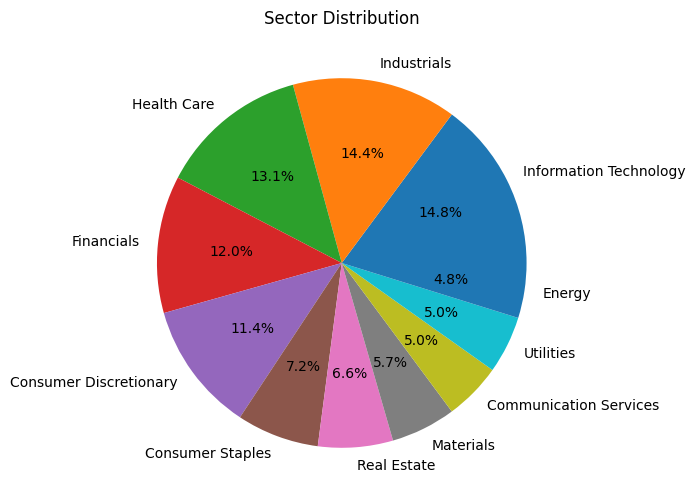

In [22]:
import matplotlib.pyplot as plt

# 3
sector_distribution = df_cleaned["GICS\xa0Sector"].value_counts()

print(sector_distribution)
#piechart
plt.figure(figsize=(10, 6))
plt.pie(sector_distribution, labels=sector_distribution.index, autopct='%1.1f%%')
plt.title('Sector Distribution')
plt.show()


In [23]:
# 4
# Extract state from the "hq" column
df_cleaned['hq_state'] = df_cleaned['hq'].str.extract(r'\, (\w\w)$')

# Get the state distribution
state_distribution = df_cleaned['hq_state'].value_counts()

# Print state distribution
print(state_distribution)


UK    1
Name: hq_state, dtype: int64


/var/folders/04/7w96f6054nn3b4jcfrrz9k480000gn/T/ipykernel_50710/3805575084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hq_state'] = df_cleaned['hq'].str.extract(r'\, (\w\w)$')


In [24]:
# 5
subindustry_url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
subindustry_df = pd.read_csv(subindustry_url)

subindustry_df.head()
#OK MERGE ON SYMBOL

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment


In [25]:
# Download 
subindustry_url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
subindustry_df = pd.read_csv(subindustry_url)

subindustry_df.head()
# Merge
merged_df = df_cleaned.merge(subindustry_df, on='Symbol')

# Filter
consumer_discretionary = merged_df[merged_df["GICS\xa0Sector"] == 'Consumer Discretionary']

subindustry_distribution = consumer_discretionary["GICS\xa0Sector"].value_counts()

# Print
print(subindustry_distribution)


Consumer Discretionary    52
Name: GICS Sector, dtype: int64


In [26]:
merged_df.head()

,Symbol,Security,GICS Sector,hq,included,Founded,hq_state,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,NaN,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,NaN,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,NaN,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888),NaN,Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,NaN,Health Care Equipment


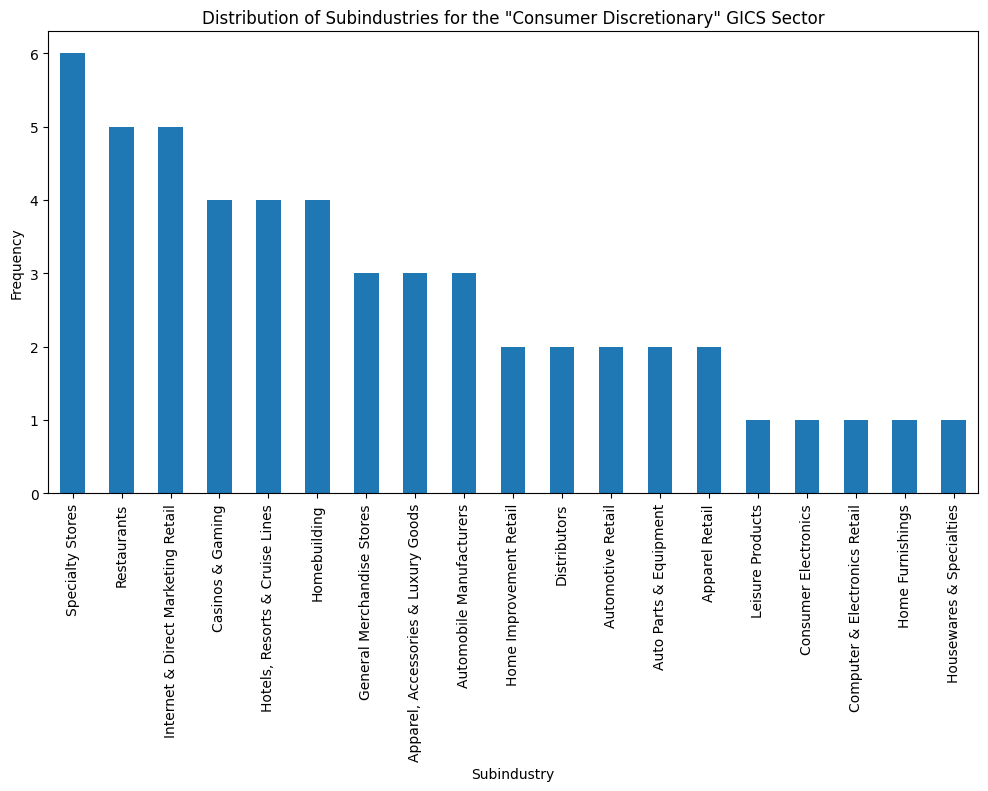

In [33]:
# distribution (cute histogram)
subindustry_distribution = consumer_discretionary['subindustry'].value_counts()
plt.figure(figsize=(12, 6))
subindustry_distribution.plot(kind='bar')
plt.xlabel('Subindustry')
plt.ylabel('Frequency')
plt.title('Distribution of Subindustries for the "Consumer Discretionary" GICS Sector')
plt.xticks(rotation=90)
plt.show()